In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist # conjunto de datos
from tensorflow import keras # libreria de tensorflow
from tensorflow.keras import layers # Capas de las redes neuronales
import matplotlib.pyplot as plt

# Problemas a resolver
* Predecir números del 0 al 9 basado en imagenes
* Clasificar ropa basado en imagenes.

Este es el dataset mnist

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Escala de grises:
* 0 es negro
* 255 es blanco

![image.png](attachment:image.png)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape, test_images.shape)
print(train_labels, len(train_labels))
print(test_labels, len(test_labels))

(60000, 28, 28) (10000, 28, 28)
[5 0 4 ... 5 6 8] 60000
[7 2 1 ... 4 5 6] 10000


* Cada imagen es un arreglo de 28 * 28
* Cada cuadrito tiene un valor entre 0 y 255
* Hay 60000 imagenes de entrenamiento y 10000 de testeo.

![image.png](attachment:image.png)

### Diagrama de flujo del modelo
Se alimenta la red neuronal con el conjunto de entrenamiento -> realiza las predicciones -> verificamos con métricas las predicciones del modelo.

#### Construcción de la red neuronal

![image.png](attachment:image.png)

Las funciones de activación dan una representación de los datos:
* Como sucedió en el caso de la regresión logística que es la composición de dos funciones: función lineal y función sigmoide.
* link: https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks
* link: https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

Función de activación RELU:
* Reduce el costo computacional porque no activa todos los nodos.
* Convierte a cero los valores que son menores a cero, de ahí que los valores que lleguen a Relu con un valor negativo el output será cero desactivando el nodo.

 ![image.png](attachment:image.png)

Función de activación softmax: Es usado en problemas de multiclases, como en el problema de predecir números del 0 al 9.

![image.png](attachment:image.png)

In [ ]:
model = keras.Sequential([
    layers.Dense(512, # cantidad de nodos de una capa
                 activation = 'relu', # función de activación
                 input_shape = (784,)), # Este parámetro no es necesario, es la conversion de mi imagen de 28 pixel por 28 pixels=784 componentes
    layers.Dense(10,
                 activation='softmax') # arroja las probabilidades para cada valor numérico
])

c:\Users\Michael_PC\OneDrive - Ministerio de Ambiente y Desarrollo Sostenible\Documentos\trabajos\technalia\curso\technalia_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Definir 3 cosas más para el modelo
* optimizador: El mecanismo por el cuál el modelo va a actualizarse reduciendo el error en la función de costo
* función de costo: Función que mide el error (distancia entre la predicción y el valor real).
* métrica: función que mide el nivel de predicción del modelo.

![image.png](attachment:image.png)

Cuando una red neuronal tiene un proceso de optimización se le dice que es una red recurrente.

### Optimizador rmsprop (Root Mean Squared Propagation)
* Es una función usada para reducir la función de costo cada vez que se ajusten los pesos de las capas.
* Es la forma de actualizar los pesos de las capas para llegar al valor mínimo global de la función de costo.
* link: https://medium.com/thedeephub/what-is-rmsprop-0f54effc47e4

![image.png](attachment:image.png)

### Función de costo sparse_categorical_crossentropy
* Genera un arreglo mostrando la probabilidad de cada categoría en la predicción y selecciona la que tiene mayor probabilidad.
* https://fmorenovr.medium.com/sparse-categorical-cross-entropy-vs-categorical-cross-entropy-ea01d0392d28

![image.png](attachment:image.png)

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Convertirmos las imagenes de dimensión (28, 28) a un arreglo de dimensión 28 x 28

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255 # valor máximo que puede tener un pixel
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")/255

In [ ]:
print(train_images.shape, len(train_labels))

(60000, 784) 60000


### Forma de entrenar la red neuronal

![image-2.png](attachment:image-2.png)

* Los epoch se usan para reducir el error en la función de costo y que los pesos en cada capa se ajusten de acuerdo a la reducción del error.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8685 - loss: 0.4539
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9660 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9782 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9850 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9897 - loss: 0.0359


Testeo del modelo

10 imágenes, donde cada imagen es un vector de tamaño 28 * 28

In [ ]:
test_digits = test_images[0:10] #10 primeras imagenes del conjunto dd testeo
test_digits.shape

(10, 784)

Retorna una probabilidad por cada dígito

In [ ]:
predicciones = model.predict(test_digits)
predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


array([[7.9907707e-08, 2.4071334e-09, 1.0110504e-05, 5.1095907e-05,
        2.4378569e-11, 1.4145741e-08, 2.2921116e-12, 9.9993157e-01,
        2.1971738e-07, 6.8917534e-06],
       [1.3014188e-07, 7.7269642e-06, 9.9998128e-01, 1.0255288e-05,
        1.0588322e-13, 4.2051478e-09, 2.1730855e-08, 2.0997603e-12,
        5.3209124e-07, 1.8390851e-12],
       [2.0928890e-06, 9.9871361e-01, 1.2964012e-04, 9.8498258e-06,
        1.2066055e-04, 7.3067681e-06, 3.6204550e-05, 7.0560555e-04,
        2.7321395e-04, 1.9235822e-06],
       [9.9987292e-01, 1.0300863e-08, 5.3396365e-05, 1.0039058e-06,
        3.5354908e-08, 8.2306492e-08, 1.0772617e-06, 6.0562729e-06,
        1.2620442e-09, 6.5426335e-05],
       [2.3073064e-06, 8.2303826e-09, 5.6184908e-06, 1.5372335e-08,
        9.9913579e-01, 1.1104000e-08, 4.5237548e-06, 5.7696638e-05,
        6.8925999e-07, 7.9345703e-04],
       [2.6634718e-08, 9.9958545e-01, 6.0724261e-07, 2.7965393e-07,
        2.9904140e-05, 5.2998743e-09, 4.3112358e-08, 3.80

La predicción más alta es 9.99945760e-01 está asociada a su posición en el arreglo. Es decir, la predicción es el número 7

![image.png](attachment:image.png)

In [ ]:
print(predicciones[0].argmax(),', ' ,predicciones[0][6])
for index, prediccion in enumerate(predicciones):
    for posicion in range(0,len(prediccion)):
        print(predicciones[index].argmax(), ',', predicciones[index][posicion], test_labels[index])

7 ,  2.2921116e-12
7 , 7.990771e-08 7
7 , 2.4071334e-09 7
7 , 1.0110504e-05 7
7 , 5.1095907e-05 7
7 , 2.4378569e-11 7
7 , 1.4145741e-08 7
7 , 2.2921116e-12 7
7 , 0.9999316 7
7 , 2.1971738e-07 7
7 , 6.8917534e-06 7
2 , 1.3014188e-07 2
2 , 7.726964e-06 2
2 , 0.9999813 2
2 , 1.0255288e-05 2
2 , 1.0588322e-13 2
2 , 4.205148e-09 2
2 , 2.1730855e-08 2
2 , 2.0997603e-12 2
2 , 5.3209124e-07 2
2 , 1.839085e-12 2
1 , 2.092889e-06 1
1 , 0.9987136 1
1 , 0.00012964012 1
1 , 9.849826e-06 1
1 , 0.00012066055 1
1 , 7.306768e-06 1
1 , 3.620455e-05 1
1 , 0.00070560555 1
1 , 0.00027321395 1
1 , 1.9235822e-06 1
0 , 0.9998729 0
0 , 1.0300863e-08 0
0 , 5.3396365e-05 0
0 , 1.0039058e-06 0
0 , 3.535491e-08 0
0 , 8.230649e-08 0
0 , 1.0772617e-06 0
0 , 6.056273e-06 0
0 , 1.2620442e-09 0
0 , 6.5426335e-05 0
4 , 2.3073064e-06 4
4 , 8.230383e-09 4
4 , 5.618491e-06 4
4 , 1.5372335e-08 4
4 , 0.9991358 4
4 , 1.1104e-08 4
4 , 4.523755e-06 4
4 , 5.7696638e-05 4
4 , 6.8926e-07 4
4 , 0.00079345703 4
1 , 2.6634718e-08 1
1

Evaluando y testeando el modelo

Qué significa el número **313**?
* Por defecto tensorflow crea lotes de tamaño 32. De ahí que la cantidad de lotes sea 313 cada uno compuesto de 32 imágenes.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9758 - loss: 0.0804
0.06708967685699463 0.9796000123023987


### Ejercicio durante la clase

Usar el dataset: fashion_mnist de la misma librería:
* tensorflow.keras.datasets

In [ ]:
(train_images_fm, train_labels_fm), (test_images_fm, test_labels_fm) = (fashion_mnist.load_data())

Tipo de imagenes a estudiar

In [ ]:
# Define the class names for Fashion MNIST
class_names = ['camiseta/top', 'trusa', 'saco', 'vestido', 'abrigo',
               'zapato de tacón', 'camisa', 'tennis', 'maleta', 'bota de tobillo']

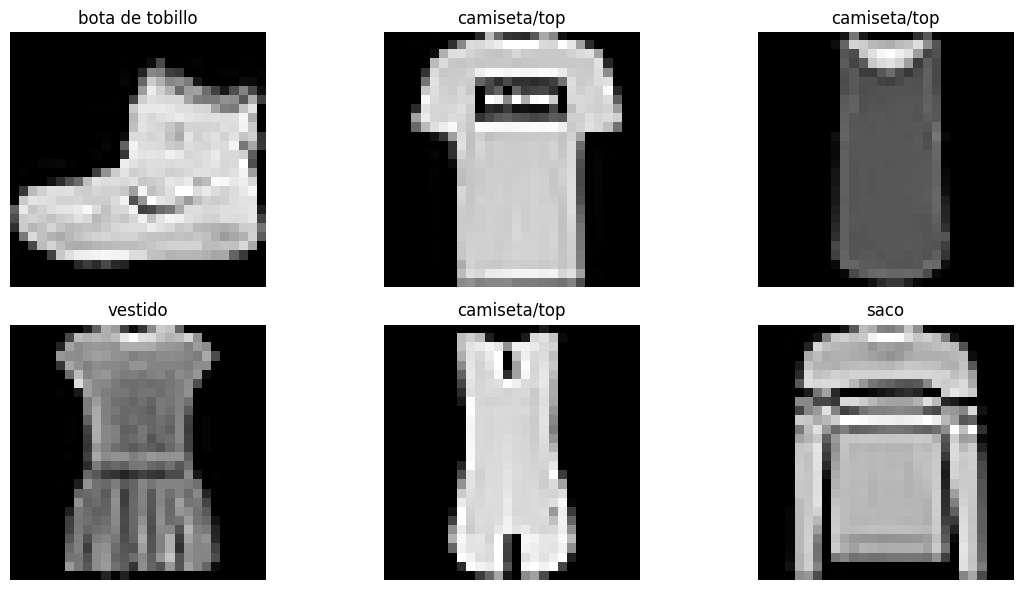

In [ ]:
# Plot six images in pairs
plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_images_fm[i], cmap='gray')
    plt.title(class_names[train_labels_fm[i]])
    plt.axis('off')

plt.tight_layout()

* Son imágenes similares al conjunto de datos de los números compuestos de 28 x 28 pixeles

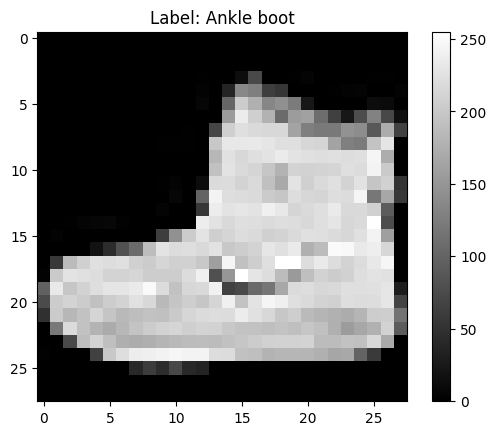

In [ ]:
# Select an image to visualize (e.g., the first image in the training set)
image_index = 0  # You can change this index to visualize different images
image = train_images_fm[image_index]
label = train_labels_fm[image_index]

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the image
plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title(f'Label: {class_names[label]}')
plt.show()

Realizar una red neuronal similar, pero usando este conjunto de datos:
* variando el tamaño de los lotes.

#### ¿Cómo seleccionar la cantidad de capas, de nodos, optimizadores?
Usamos gridsearch nuevamente